### Обидина Ксения Александровна гр. М20-ЯЭ

#### Лабораторная работа №3. Методы классификации данных

##### Вариант 35

##### Набор данных - 9

##### Классификаторы:

1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);  
4 – логический классификатор (бинарное решающее дерево).

##### Задание

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

##### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

* tBodyAcc-XYZ - ускорение тела по осям XYZ
* tGravityAcc-XYZ -ускорение гравитации по осям XYZ
* tBodyAccJerk-XYZ - мгновенное ускорение тела по осям XYZ
* tBodyGyro-XYZ - Положение тела в пространстве XYZ
* tBodyGyroJerk-XYZ - гироскоп ускорения тела по осям XYZ

##### f-обозначения сигналов частотной области

* fBodyAcc-XYZ - ускорение тела по осям XYZ  
* fBodyAccJerk-XYZ - мгновенное ускорение тела по осям XYZ  
* fBodyGyro-XYZ - Положение тела в пространстве XYZ


In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

Data = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
x_train = pd.DataFrame(Data)
Data = pd.read_csv('Y_train.txt', header=None, delimiter=r"\s+")
y_train = pd.DataFrame(Data)

##### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции:

In [2]:
df = pd.DataFrame(x_train)
df

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [3]:
print(f"Размер исходных данных перед удалением: {df.count().max()}")
if df.count().max()==df.drop_duplicates(keep='first').count().max():
    print("Дубликаты не найдены")
else:
    df.drop_duplicates(keep='first', inplace = True)
    print(f"Размер исходных данных перед удалением: {df.count().max()}")
df.shape

Размер исходных данных перед удалением: 7352
Дубликаты не найдены


(7352, 561)

##### 3. Оцените сбалансированность данных по классам (постройте гистограмму).

In [4]:
df1 = pd.DataFrame(y_train)
df1

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

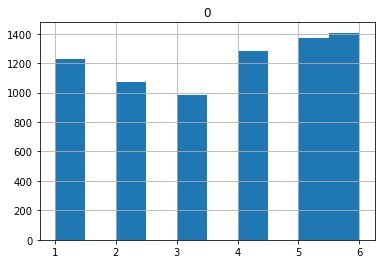

In [5]:
y_train.hist()

Данные под номером 3 имеют наибольшое отклонение от средней величины значений

##### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию):

<AxesSubplot:>

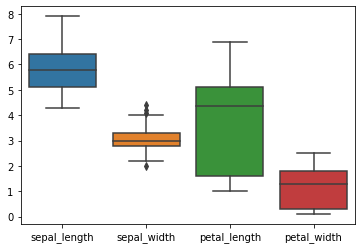

In [6]:
x_train = sns.load_dataset('iris')
sns.boxplot(data = x_train)

Нормализация:

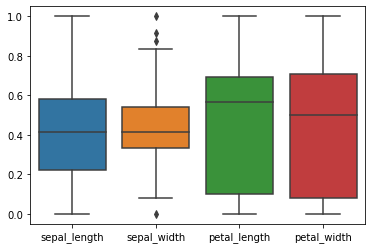

In [7]:
pillar = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
scaler = MinMaxScaler()
x_train[pillar] = scaler.fit_transform(x_train[pillar].values.astype(float))
sns.boxplot(data = x_train[pillar])
plt.show()

##### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

В данном варианте категориальных признаков нет

##### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

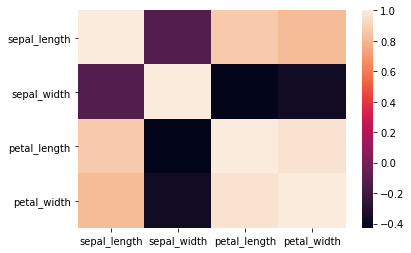

In [8]:
corr = x_train.corr()
sns.heatmap(corr)

##### 7. Заполните пропущенные значения в данных;

In [9]:
len(x_train)
x_train.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

Пропущенных значений нет

##### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

Классификаторы:  
1) Классификатор K ближайших соседей (задаётся количество ближайших объектов);  
4) Логический классификатор (бинарное решающее дерево).

##### Классификатор K ближайших соседей (задаётся количество ближайших объектов)

Подбор оптимальных параметров:

In [10]:

Data = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
x_train = pd.DataFrame(Data)
Data = pd.read_csv('Y_train.txt', header=None, delimiter=r"\s+")
y_train = pd.DataFrame(Data)
Data = pd.read_csv('X_test.txt', header=None, delimiter=r"\s+")
x_test = pd.DataFrame(Data)
Data = pd.read_csv('Y_test.txt', header=None, delimiter=r"\s+")
y_test = pd.DataFrame(Data)

Метод GridSearchCV

In [11]:
knn = KNeighborsClassifier()
grid = {"n_neighbors": range(1, 20, 1), "weights": ['uniform', 'distance']}
gs = GridSearchCV(estimator=knn, param_grid=grid, scoring="accuracy", n_jobs=-1, cv=4, verbose=10)
gs.fit(x_train, y_train)

n = gs.best_estimator_.n_neighbors
best = gs.best_score_
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train.values.ravel())
knn_predict = knn.predict(x_test)
print("Значение точности:", accuracy_score(y_test.values.ravel(), knn_predict))
print('Лучшая точность:', best)

Fitting 4 folds for each of 38 candidates, totalling 152 fits
Значение точности: 0.9036308109942314
Лучшая точность: 0.8939064200217628


##### Логический классификатор (бинарное решающее дерево)

In [12]:
dtc = DecisionTreeClassifier()

search = GridSearchCV(dtc, {'max_depth': [x for x in range(1, 50)]})
search.fit(x_train, y_train)

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

parametrs = {'max_depth': list(range(1, 7)), 'max_features': list(range(1, 7))}
decision_tree_grid = GridSearchCV(decision_tree, parametrs)
decision_tree_grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4, 5, 6]})

In [13]:
n = search.best_estimator_.max_depth
best = search.best_score_
print('Лучшая точность: %.2f' % best)

dtc = DecisionTreeClassifier(max_depth=n)
dtc.fit(x_train, y_train)
dtc_predict = dtc.predict(x_test)
y_score = search.best_estimator_.fit(x_train, y_train).predict(x_test)
print('Значение точности: %.2f' % accuracy_score(y_test, dtc_predict))

Лучшая точность: 0.85
Значение точности: 0.87
